# Passageiros

In [202]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = (20)

In [203]:
uri = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv'

passageiros = pd.read_csv(uri)
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


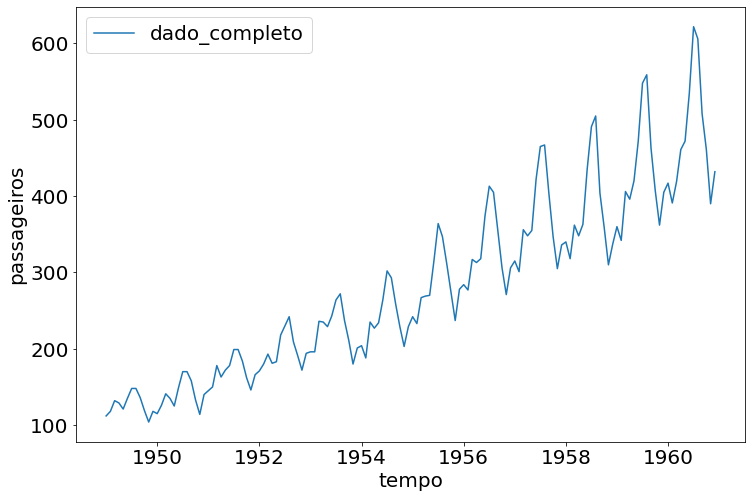

In [204]:
sns.lineplot(x='tempo',y='passageiros',data=passageiros, label='dado_completo')

In [205]:
sc = StandardScaler()
sc.fit(passageiros)
dado_escalado =  sc.transform(passageiros)

In [206]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

Text(0, 0.5, 'Data')

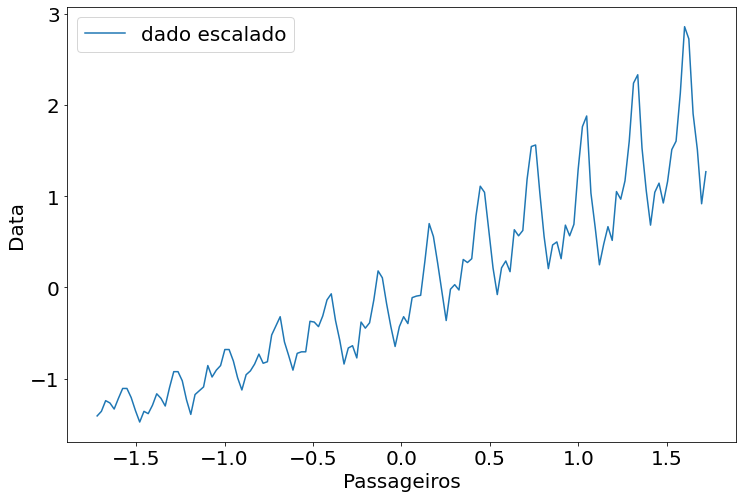

In [207]:
sns.lineplot(x=x,y=y,label='dado escalado')
plt.xlabel('Passageiros')
plt.ylabel('Data')

In [208]:
tamanho_treino = int(len(passageiros) * 0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [209]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

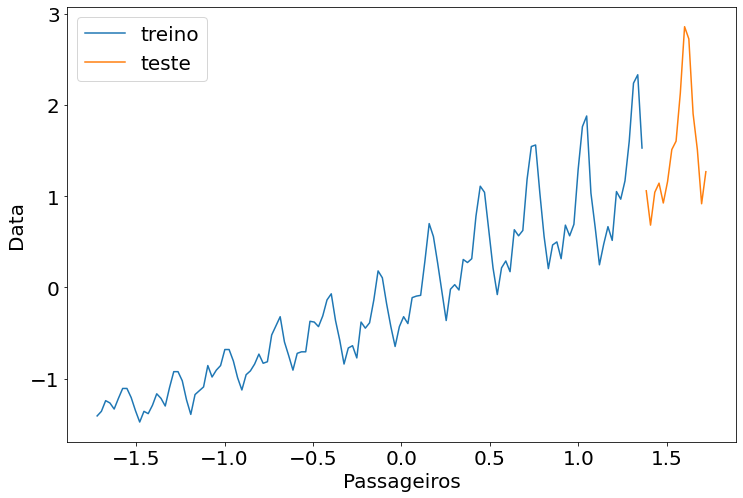

In [210]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
plt.xlabel('Passageiros')
plt.ylabel('Data')
plt.legend()

In [211]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [212]:
regressor = Sequential()

regressor.add(Dense(1, input_dim=1,kernel_initializer='Ones',activation='linear', use_bias=False))

regressor.compile(loss='mean_squared_error', optimizer='adam')

In [213]:
regressor.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [214]:
regressor.fit(xtreino,ytreino)

5/5 [==============================] - 0s 3ms/step - loss: 0.1284


In [215]:
y_predict = regressor.predict(xtreino)

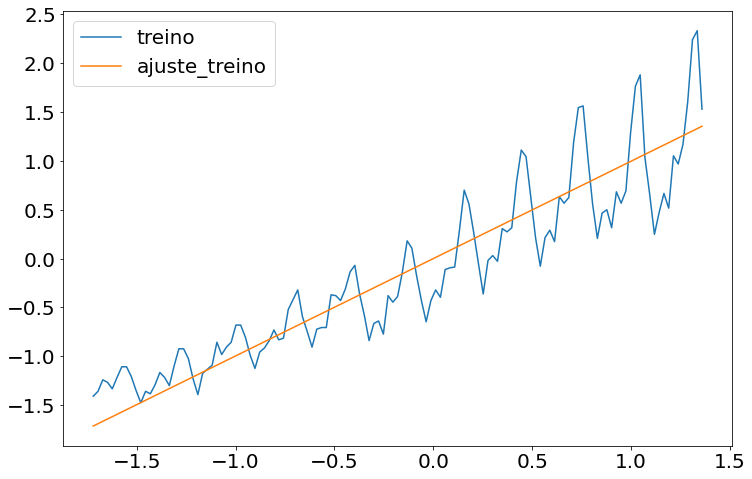

In [216]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')

In [217]:
d = {'tempo':xtreino, 'passageiros': y_predict[:,0]}
resultados = pd.DataFrame(data=d)
resultados.head()

,tempo,passageiros
0,-1.720064,-1.712796
1,-1.696007,-1.688841
2,-1.671950,-1.664886
3,-1.647894,-1.640931
4,-1.623837,-1.616976


In [218]:
resultados_transf = pd.DataFrame(sc.inverse_transform(resultados))

In [219]:
resultados_transf.columns = ['tempo', 'passageiros']

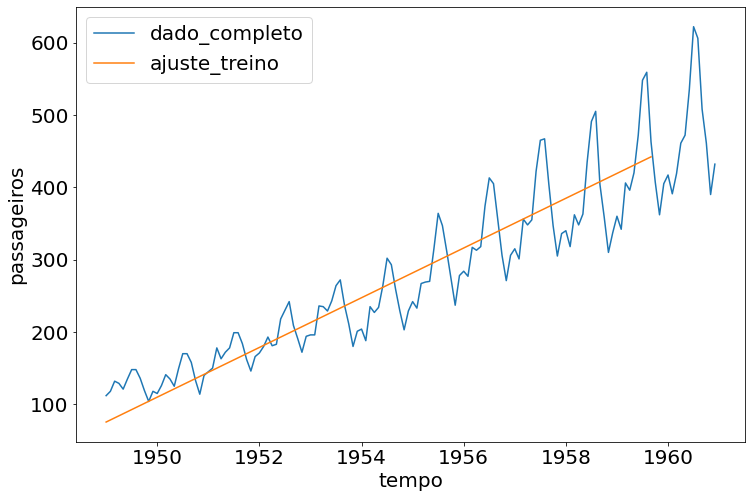

In [220]:
sns.lineplot(x='tempo',y='passageiros',data=passageiros,label='dado_completo')
sns.lineplot(x='tempo',y='passageiros',data=resultados_transf,label='ajuste_treino')

In [221]:
y_predict_teste = regressor.predict(xteste)

In [222]:
d = {'tempo':xteste, 'passageiros': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)
resultados_transf_teste = pd.DataFrame(sc.inverse_transform(resultados_teste))
resultados_transf_teste.columns = ['tempo', 'passageiros']
resultados_transf_teste.head()

,tempo,passageiros
0,1959.750000,444.968288
1,1959.833333,447.832112
2,1959.916667,450.695922
3,1960.000000,453.559746
4,1960.083333,456.423570


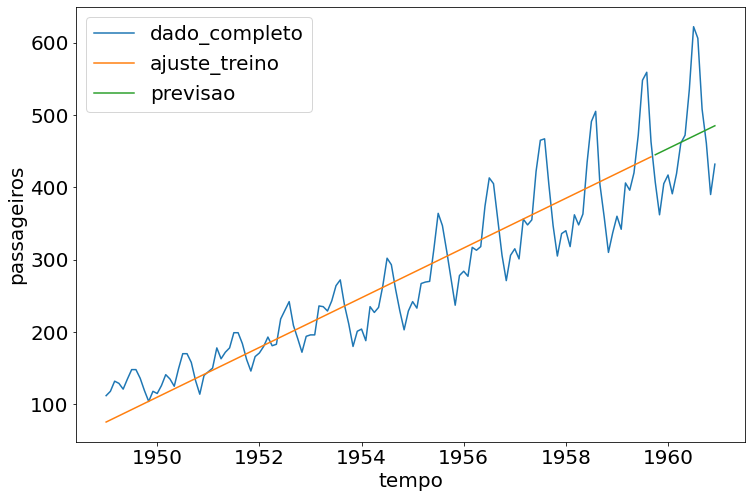

In [223]:
sns.lineplot(x='tempo',y='passageiros',data=passageiros,label='dado_completo')
sns.lineplot(x='tempo',y='passageiros',data=resultados_transf,label='ajuste_treino')
sns.lineplot(x='tempo',y='passageiros',data=resultados_transf_teste,label='previsao')


In [224]:
regressor2 = Sequential()
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [225]:
regressor2.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 8)                 8         
                                                                 
 dense_41 (Dense)            (None, 8)                 64        
                                                                 
 dense_42 (Dense)            (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [226]:
regressor2.fit(xtreino,ytreino,epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8353
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8263
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8212
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8149
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8098
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8062
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8023
Epoch 8/500
5/5 [==============================] - 0s 5ms/step - loss: 0.7994
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7965
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7947
Epoch 11/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7929
Epoch 12/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7918
Epoch 13/500
5/5 [==============================] - 0s 3ms/st

In [227]:
y_predict = regressor2.predict(xtreino)

In [228]:
y_predict_teste = regressor2.predict(xteste)

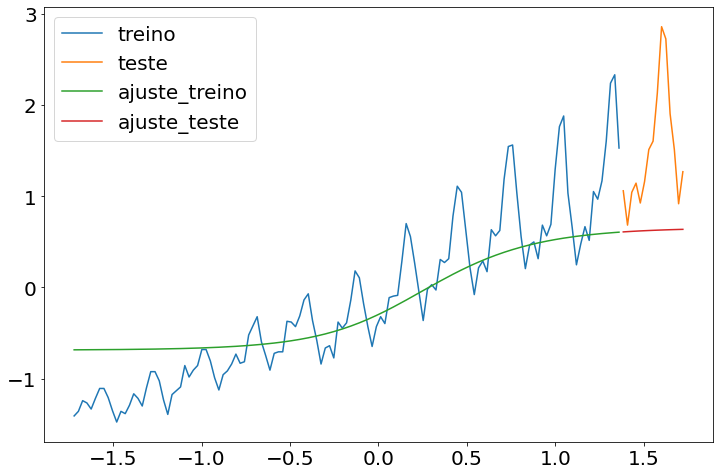

In [229]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')
sns.lineplot(x=xteste,y=y_predict_teste[:,0],label='ajuste_teste')

In [230]:
vetor = pd.DataFrame(ytreino)[0]

In [231]:
def separa_dados(vetor,n_passos):
    x_novo, y_novo = [], []

    for i in range(n_passos, vetor.shape[0]):
        x_novo.append(list(vetor.loc[i-n_passos:i-1]))
        y_novo.append(vetor.loc[i])

    x_novo, y_novo = np.array(x_novo), np.array(y_novo)

    return x_novo, y_novo

In [232]:
x_treino_novo, y_treino_novo = separa_dados(vetor,1)

In [233]:
vetor2 = pd.DataFrame(yteste)[0]

In [234]:
x_teste_novo, y_teste_novo = separa_dados(vetor2,1)

In [235]:
regressor3 = Sequential()
regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear', use_bias=False))
regressor3.add(Dense(64,  kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor3.add(Dense(1,  kernel_initializer='random_uniform', activation='linear', use_bias=False))

regressor3.compile(loss='mean_squared_error', optimizer='adam')

regressor3.fit(x_treino_novo, y_treino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7806
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7522
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7266
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7080
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6863
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6654
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6384
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6100
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5834
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5486
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5148
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4758
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

In [236]:
y_predict_novo = regressor3.predict(x_treino_novo)

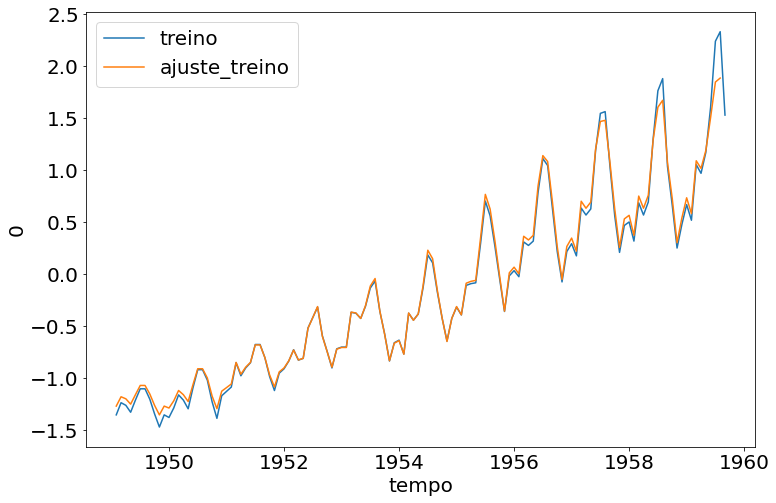

In [237]:
sns.lineplot(x='tempo',y=y_treino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')

In [238]:
y_predict_teste_novo = regressor3.predict(x_teste_novo)

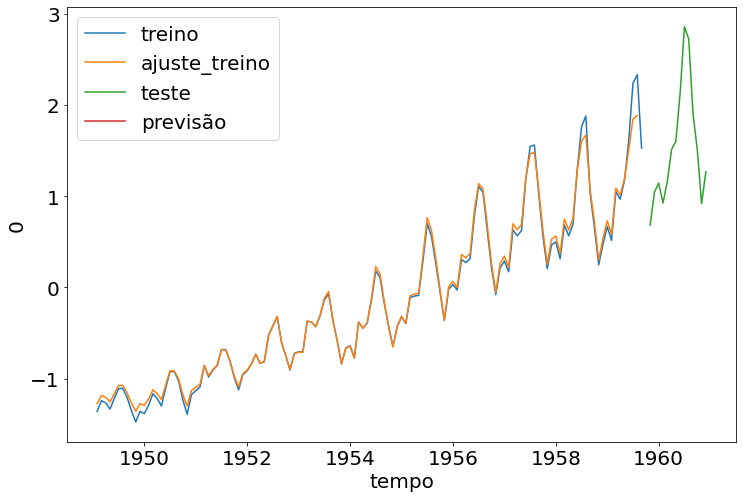

In [239]:
sns.lineplot(x='tempo',y=y_treino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')
sns.lineplot(x='tempo',y=y_teste_novo, data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_teste_novo)[0], data=passageiros[130:144], label='previsão')

In [259]:
x_treino_novo, y_treino_novo = separa_dados(vetor,4)
x_teste_novo, y_teste_novo = separa_dados(vetor2,4)

In [260]:
regressor4 = Sequential()
regressor4.add(Dense(8, input_dim=4, kernel_initializer='ones', activation='linear', use_bias=False))
regressor4.add(Dense(64,  kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor4.add(Dense(1,  kernel_initializer='random_uniform', activation='linear', use_bias=False))

regressor4.compile(loss='mean_squared_error', optimizer='adam')

regressor4.fit(x_treino_novo, y_treino_novo, epochs=300)

Epoch 1/300
4/4 [==============================] - 1s 6ms/step - loss: 0.8106
Epoch 2/300
4/4 [==============================] - 0s 5ms/step - loss: 0.6994
Epoch 3/300
4/4 [==============================] - 0s 5ms/step - loss: 0.6197
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 0.5530
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 0.5004
Epoch 6/300
4/4 [==============================] - 0s 5ms/step - loss: 0.4411
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 0.3854
Epoch 8/300
4/4 [==============================] - 0s 7ms/step - loss: 0.3333
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2837
Epoch 10/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2422
Epoch 11/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2068
Epoch 12/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1808
Epoch 13/300
4/4 [==============================] - 0s 4ms/st

In [261]:
y_predict_teste_novo = regressor4.predict(x_teste_novo)
y_predict_novo = regressor4.predict(x_treino_novo)

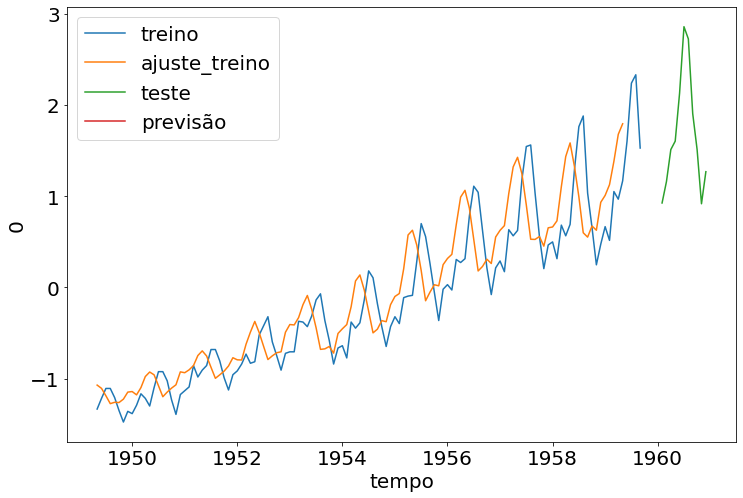

In [262]:
sns.lineplot(x='tempo',y=y_treino_novo, data=passageiros[4:129], label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0], data=passageiros[4:129], label='ajuste_treino')
sns.lineplot(x='tempo',y=y_teste_novo, data=passageiros[133:144], label='teste')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_teste_novo)[0], data=passageiros[133:144], label='previsão')

# Bicicletas

In [268]:
uri = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv'

bike = pd.read_csv(uri)
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [270]:
bike['datas'] = pd.to_datetime(bike['datas'])

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

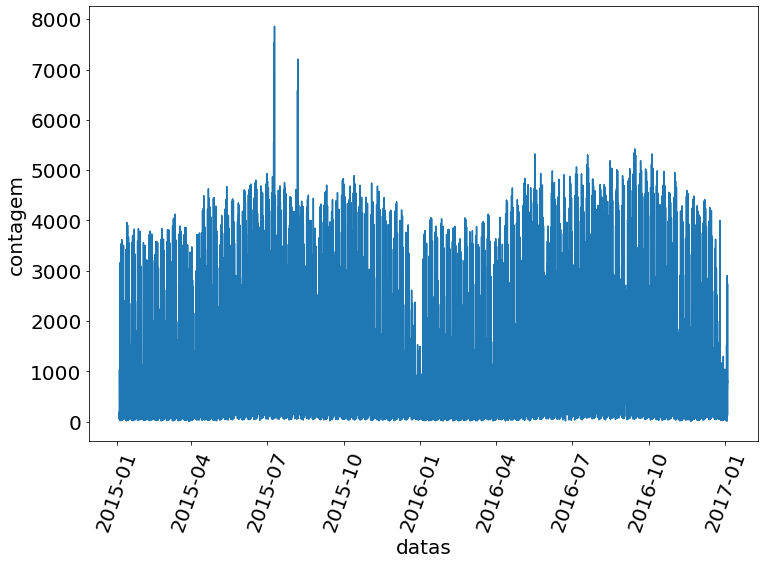

In [273]:
sns.lineplot(x='datas', y='contagem', data=bike)
plt.xticks(rotation=70)

In [277]:
sc2 = StandardScaler()

sc2.fit(bike['contagem'].values.reshape(-1,1))

y = sc2.transform(bike['contagem'].values.reshape(-1,1))

In [279]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike)-tamanho_treino

ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

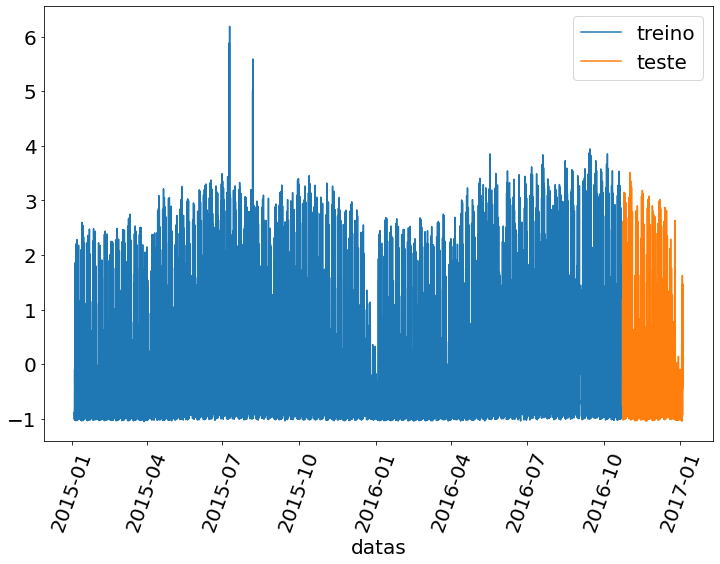

In [281]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas',y=yteste[:,0],data=bike[tamanho_treino:len(bike)], label='teste')
plt.xticks(rotation=70)

In [303]:
vetor = pd.DataFrame(ytreino)[0]
vetor2 = pd.DataFrame(yteste)[0]

In [304]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 10)

In [305]:
xteste_novo, yteste_novo = separa_dados(vetor2, 10)

In [306]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0], xtreino_novo.shape[1],1))
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0], xteste_novo.shape[1],1))

In [307]:
from tensorflow.keras.layers import LSTM

In [309]:
recorrente = Sequential()

recorrente.add(LSTM(128,input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))

recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

recorrente.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               66560     
                                                                 
 dense_59 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [312]:
recorrente.fit(xtreino_novo, ytreino_novo, validation_data=(xteste_novo,yteste_novo), epochs=10 )

Epoch 1/10
490/490 [==============================] - 9s 18ms/step - loss: 0.0320 - val_loss: 0.0216
Epoch 2/10
490/490 [==============================] - 6s 12ms/step - loss: 0.0313 - val_loss: 0.0173
Epoch 3/10
490/490 [==============================] - 8s 16ms/step - loss: 0.0305 - val_loss: 0.0357
Epoch 4/10
490/490 [==============================] - 8s 15ms/step - loss: 0.0303 - val_loss: 0.0202
Epoch 5/10
490/490 [==============================] - 7s 14ms/step - loss: 0.0292 - val_loss: 0.0169
Epoch 6/10
490/490 [==============================] - 7s 13ms/step - loss: 0.0290 - val_loss: 0.0190
Epoch 7/10
490/490 [==============================] - 6s 12ms/step - loss: 0.0285 - val_loss: 0.0170
Epoch 8/10
490/490 [==============================] - 6s 12ms/step - loss: 0.0277 - val_loss: 0.0193
Epoch 9/10
490/490 [==============================] - 6s 12ms/step - loss: 0.0273 - val_loss: 0.0180
Epoch 10/10
490/490 [==============================] - 6s 12ms/step - loss: 0.0270 - val_lo

In [313]:
y_ajustado = recorrente.predict(xtreino_novo)
y_predito = recorrente.predict(xteste_novo)

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

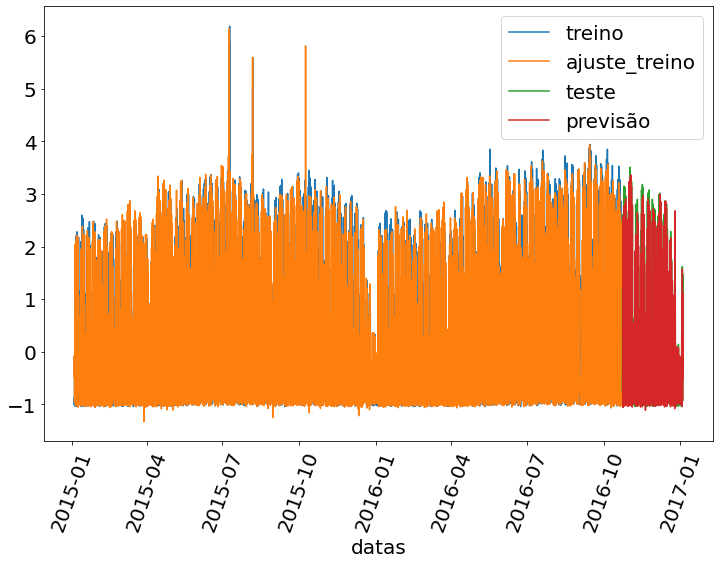

In [314]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0],data=bike[0:15662],label='ajuste_treino')
sns.lineplot(x='datas',y=yteste[:,0],data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas',y=y_predito[:,0],data=bike[tamanho_treino+10:len(bike)], label='previsão')
plt.xticks(rotation=70) 

In [315]:
from tensorflow.keras.layers import GRU

recorrente_g = Sequential()

recorrente_g.add(GRU(128,input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])))
recorrente_g.add(Dense(units=1))
recorrente_g.compile(loss='mean_squared_error',optimizer='RMSProp')

In [316]:
recorrente_g.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense_60 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [320]:
resultado2 = recorrente_g.fit(xtreino_novo,ytreino_novo, validation_data=(xteste_novo,yteste_novo),epochs=10)

Epoch 1/10
490/490 [==============================] - 7s 13ms/step - loss: 0.0553 - val_loss: 0.0301
Epoch 2/10
490/490 [==============================] - 6s 13ms/step - loss: 0.0445 - val_loss: 0.0253
Epoch 3/10
490/490 [==============================] - 8s 15ms/step - loss: 0.0396 - val_loss: 0.0292
Epoch 4/10
490/490 [==============================] - 9s 17ms/step - loss: 0.0368 - val_loss: 0.0245
Epoch 5/10
490/490 [==============================] - 5s 11ms/step - loss: 0.0345 - val_loss: 0.0243
Epoch 6/10
490/490 [==============================] - 5s 11ms/step - loss: 0.0337 - val_loss: 0.0199
Epoch 7/10
490/490 [==============================] - 5s 11ms/step - loss: 0.0328 - val_loss: 0.0227
Epoch 8/10
490/490 [==============================] - 5s 11ms/step - loss: 0.0310 - val_loss: 0.0191
Epoch 9/10
490/490 [==============================] - 5s 11ms/step - loss: 0.0304 - val_loss: 0.0200
Epoch 10/10
490/490 [==============================] - 5s 11ms/step - loss: 0.0293 - val_lo

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

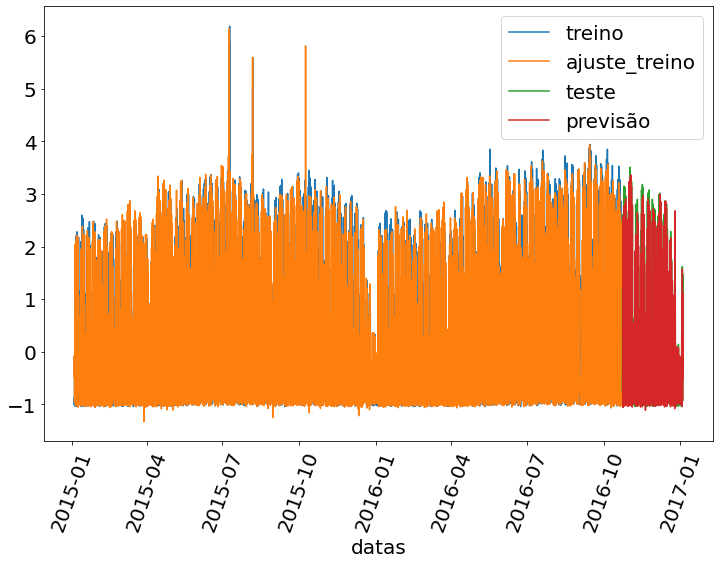

In [321]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0],data=bike[0:15662],label='ajuste_treino')
sns.lineplot(x='datas',y=yteste[:,0],data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas',y=y_predito[:,0],data=bike[tamanho_treino+10:len(bike)], label='previsão')
plt.xticks(rotation=70) 

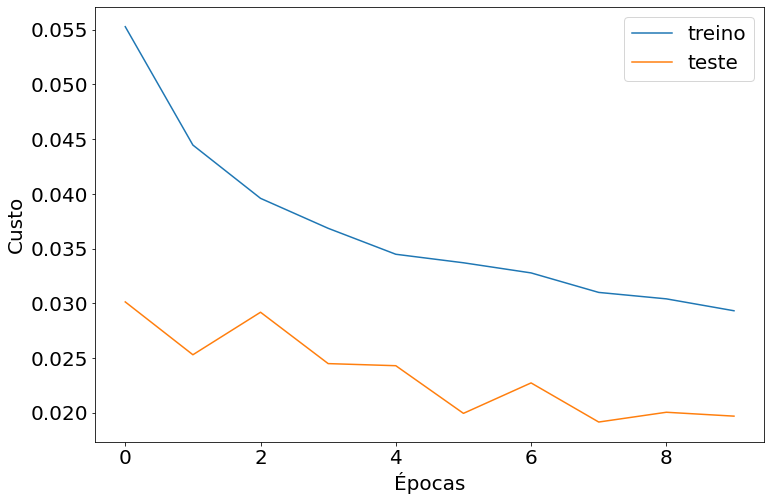

In [326]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.ylabel('Custo')
plt.xlabel('Épocas')
plt.legend(['treino','teste'])